In [1]:
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import json

from typing import Dict, TypedDict, List
from collections import Counter

## Importing JSON to dataframe and getting some interesting datas 

One collision is one dataframe.

Get all ipAdresses, asn, asnRegisty and asnCountryCode by collision.

In [69]:
filepath = './collisions_completed.json'

collisions = None
with open(filepath, 'r', encoding='utf-8') as file:
    collisions: List = json.load(file)

results: List[pd.DataFrame] = []

for collisions_dict in collisions:  # each row is a collision dataframe
    collisions_df = pd.DataFrame.from_dict(collisions_dict).transpose()
    
    g = collisions_df.groupby(['ipAdressess', 'asn'])
    display(g.first())
    
    print('-- ipAdressess --')
    print(collisions_df['ipAdressess'].value_counts().to_string())
    print('\n-- asn --')
    print(collisions_df['asn'].value_counts().to_string())
    print('\n-- asnRegistry --')
    print(collisions_df['asnRegistry'].value_counts().to_string())
    print('\n-- asnCountryCode --')
    print(collisions_df['asnCountryCode'].value_counts().to_string())
    
    results.append(collisions_df)

    print()


,,keyType,dnsNames,publicKeyRaw,commonName,countryName,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
ipAdressess,asn,,,,,,,,,,
185.199.108.153,54113,rsaEncryption,pjstein.co,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,ripencc,185.199.108.0/24,NL,2017-04-13,"FASTLY, US"
185.199.109.153,54113,rsaEncryption,chriscressman.com,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,ripencc,185.199.109.0/24,NL,2017-04-13,"FASTLY, US"
185.199.110.153,54113,rsaEncryption,dilas.org,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
185.199.111.153,54113,rsaEncryption,blog.l4ys.tw,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
217.70.184.56,29169,rsaEncryption,earthsim.pyviz.org,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,ripencc,217.70.184.0/24,FR,2003-07-31,GANDI-AS Domain name registrar - http://www.ga...


-- ipAdressess --
185.199.108.153    10
185.199.110.153    10
185.199.111.153     8
185.199.109.153     4
217.70.184.56       1

-- asn --
54113    32
29169     1

-- asnRegistry --
ripencc    33

-- asnCountryCode --
NL    32
FR     1



,,keyType,dnsNames,publicKeyRaw,commonName,countryName,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
ipAdressess,asn,,,,,,,,,,
23.185.0.2,54113,rsaEncryption,5697982787747840-fe2.pantheonsite.io,3082010a02820101009431aa7e4711e7c2431948e37c5d...,Let's Encrypt Authority X3,US,arin,23.185.0.0/24,US,2016-11-21,"FASTLY, US"
23.185.0.4,54113,rsaEncryption,*.devportal.apigee.io,3082010a02820101009431aa7e4711e7c2431948e37c5d...,GTS CA 1O1,US,arin,23.185.0.0/24,US,2016-11-21,"FASTLY, US"


-- ipAdressess --
23.185.0.2    2
23.185.0.4    1

-- asn --
54113    3

-- asnRegistry --
arin    3

-- asnCountryCode --
US    3



,,keyType,dnsNames,publicKeyRaw,commonName,countryName,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
ipAdressess,asn,,,,,,,,,,
151.101.1.195,54113,rsaEncryption,aaronmlyons.com,3082010a0282010100d821d196e6d0845c6b0849203741...,Let's Encrypt Authority X3,US,arin,151.101.0.0/22,US,2016-02-01,"FASTLY, US"
151.101.65.195,54113,rsaEncryption,africantriviaquestions.com,3082010a0282010100d821d196e6d0845c6b0849203741...,Let's Encrypt Authority X3,US,arin,151.101.64.0/22,US,2016-02-01,"FASTLY, US"
195.20.45.120,31624,rsaEncryption,01640.tk,3082010a0282010100d821d196e6d0845c6b0849203741...,Let's Encrypt Authority X3,US,ripencc,195.20.40.0/21,NL,1997-06-16,"VFMNL-AS Amsterdam Location BGP Setup, NL"


-- ipAdressess --
151.101.1.195     3
151.101.65.195    2
195.20.45.120     1

-- asn --
54113    5
31624    1

-- asnRegistry --
arin       5
ripencc    1

-- asnCountryCode --
US    5
NL    1



## Here are graphs for the first collision

In [128]:
collision1 = results[0]
display(collision1.head())

ip_source = collision1['ipAdressess'].unique()
display(ip_source)

,keyType,dnsNames,ipAdressess,publicKeyRaw,commonName,countryName,asn,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
377,rsaEncryption,pjstein.co,185.199.108.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.108.0/24,NL,2017-04-13,"FASTLY, US"
794,rsaEncryption,dilas.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
1074,rsaEncryption,blog.l4ys.tw,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
1457,rsaEncryption,mapnik.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
2177,rsaEncryption,jmcgnesbit.com,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"


array(['185.199.108.153', '185.199.110.153', '185.199.111.153',
       '185.199.109.153', '217.70.184.56'], dtype=object)

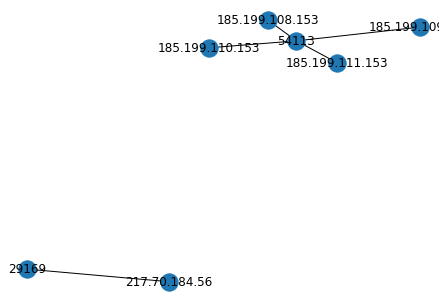

In [96]:
#Graph on collision 1, ipAdresses by asn 
ip_asn_counter = [(ip, Counter(list(collision1[collision1['ipAdressess'] == ip]['asn']))) for ip in ip_source]

g = nx.Graph()
for ip, c in ip_asn_counter:
    for k, v in c.items():
        g.add_edge(ip, k, weight=v)

pos = nx.spring_layout(g)
plt.figure()
nx.draw(g, pos, with_labels=True)

## Here are graphs for every collision

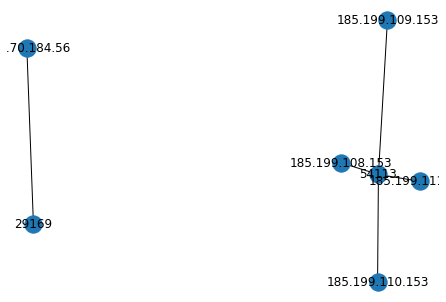

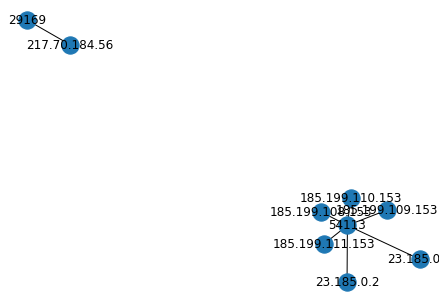

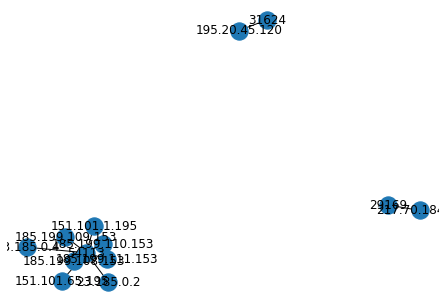

In [126]:
g = nx.Graph()

for collision in results :
    collision['ipAdressess'].unique()
    ip_source = set(_)
    ip_asn_counter = [(ip, Counter(list(collision[collision['ipAdressess'] == ip]['asn']))) for ip in ip_source]

   
    for ip, c in ip_asn_counter:
        for k, v in c.items():
            g.add_edge(ip, k, weight=v)

    pos = nx.spring_layout(g)
    plt.figure()
    nx.draw(g, pos, with_labels=True)

## Aggregate all collision into one dataframe

And get a graph out of it 

In [130]:
allcollision = pd.DataFrame()
for collision in results :
    allcollision = pd.concat([allcollision,collision], ignore_index=True)

allcollision.head()

,keyType,dnsNames,ipAdressess,publicKeyRaw,commonName,countryName,asn,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
0,rsaEncryption,pjstein.co,185.199.108.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.108.0/24,NL,2017-04-13,"FASTLY, US"
1,rsaEncryption,dilas.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
2,rsaEncryption,blog.l4ys.tw,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
3,rsaEncryption,mapnik.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
4,rsaEncryption,jmcgnesbit.com,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"


In [120]:
ip_source = allcollision['ipAdressess'].unique()

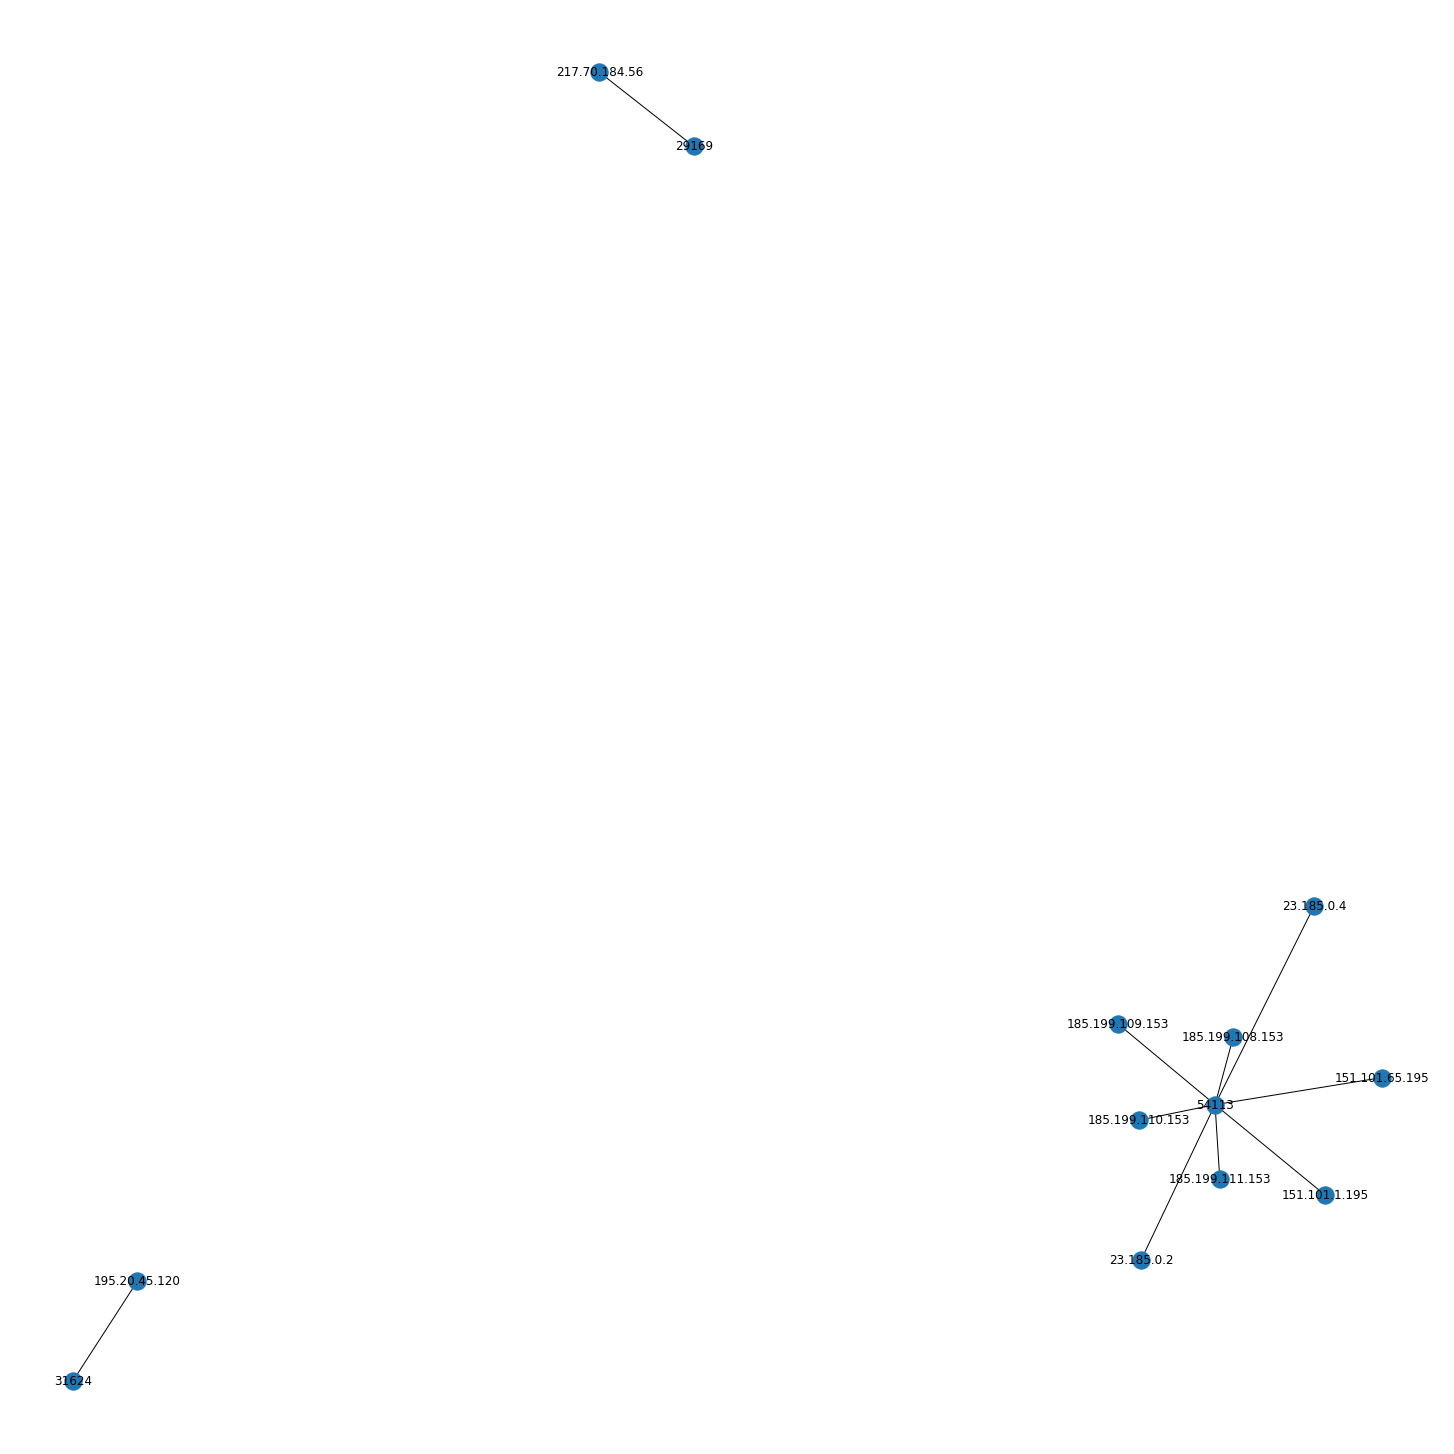

In [125]:
ip_asn_counter = [(ip, Counter(list(allcollision[allcollision['ipAdressess'] == ip]['asn']))) for ip in ip_source]

g = nx.Graph()
for ip, c in ip_asn_counter:
    for k, v in c.items():
        g.add_edge(ip, k, weight=v)

pos = nx.spring_layout(g)
f = plt.figure(3, figsize=(20, 20))
nx.draw(g, pos, with_labels=True)
plt.savefig("filename.png") 

### We can see that out the the three collisions that we had in the beggining, there is one asn that a lot of collision come from 


|                 |            |
|-----------------|------------|
| ans             | 54113      |
| ans description | FASTLY, US |

In [133]:
allcollision.loc[allcollision['asn'] == '54113']

,keyType,dnsNames,ipAdressess,publicKeyRaw,commonName,countryName,asn,asnRegistry,asnCidr,asnCountryCode,asnDate,asnDescription
0,rsaEncryption,pjstein.co,185.199.108.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.108.0/24,NL,2017-04-13,"FASTLY, US"
1,rsaEncryption,dilas.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
2,rsaEncryption,blog.l4ys.tw,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
3,rsaEncryption,mapnik.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
4,rsaEncryption,jmcgnesbit.com,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
5,rsaEncryption,microsoftcloudworkshop.com,185.199.111.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.111.0/24,NL,2017-04-13,"FASTLY, US"
6,rsaEncryption,bitcoinrabbithole.org,185.199.110.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.110.0/24,NL,2017-04-13,"FASTLY, US"
7,rsaEncryption,chriscressman.com,185.199.109.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.109.0/24,NL,2017-04-13,"FASTLY, US"
8,rsaEncryption,dk2.de,185.199.108.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.108.0/24,NL,2017-04-13,"FASTLY, US"
9,rsaEncryption,cssinjs.org,185.199.109.153,3082010a0282010100abc71b0cedc601f8eaa9b3cf0817...,Let's Encrypt Authority X3,US,54113,ripencc,185.199.109.0/24,NL,2017-04-13,"FASTLY, US"
